In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [5]:
global_temp_country = pd.read_csv(r"C:\Users\ZenBook\Downloads\UDEMY\Global Warming Analysis\2.Global Warming Analysis\GlobalLandTemperaturesByCountry.csv")
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
global_temp_country.shape

(577462, 4)

In [7]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [8]:
## drop missing data
global_temp_country.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [9]:
pd.set_option('display.max_rows',243)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Bahrain                                      25.930809
Ba

In [10]:
### Lets check whether there is a duplicate value in country or not

In [11]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [12]:
dict={'Denmark (Europe)':'Denmark',
      'France (Europe)':'France',
      'Netherlands (Europe)':'Netherlands',
      'United Kingdom (Europe)':'United Kingdom',
     'Congo (Democratic Republic Of The)':'Congo'}

In [13]:
global_temp_country['Country']=global_temp_country['Country'].replace(dict)

In [14]:
global_temp_country['Country'].nunique()

237

## Let's calculate average temperature for each country

In [15]:
pd.set_option('display.max_rows',243)
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [17]:
!pip install chart-studio


     -------------------------------------- 64.4/64.4 kB 859.9 kB/s eta 0:00:00


In [18]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)


In [19]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature ',template="plotly_dark")
fig.show()

##  Sort the countries by the average temperature and plot Horizontal Bar

<Axes: xlabel='AverageTemperature', ylabel='Country'>

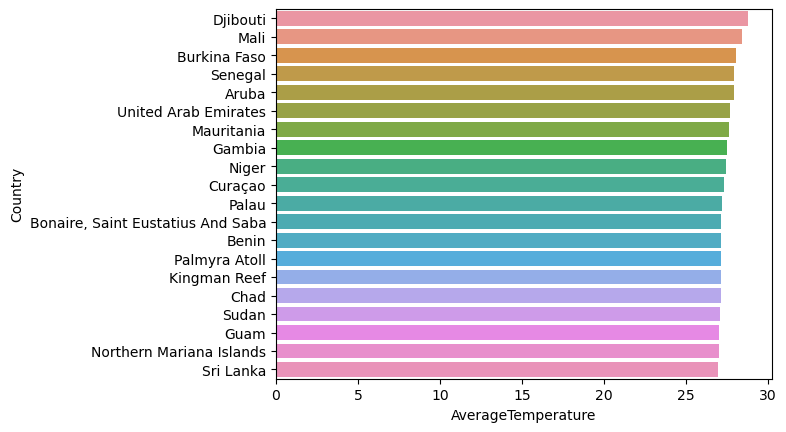

In [20]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

## 3) Is there a global warming?

    Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [21]:
global_temp = pd.read_csv(r"C:\Users\ZenBook\Downloads\UDEMY\Global Warming Analysis\2.Global Warming Analysis\GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
global_temp['dt'][0].split('-')[0]

'1750'

In [23]:
def fetch_year(date):
    return date.split('-')[0]

In [24]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [25]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [26]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [27]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']- data['LandAverageTemperatureUncertainty']

In [28]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [29]:
import plotly.express as px
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Average Land Temperature in World",template="plotly_dark")
fig.show()

    From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

## Analyse Average temperature in each season

In [30]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [31]:
global_temp.shape

(3192, 10)

In [32]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [33]:
global_temp['month'] = global_temp['dt'].dt.month

In [34]:
global_temp.drop('dt',axis=1,inplace=True)

In [35]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [36]:
global_temp.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
month                                          int64
dtype: object

In [37]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [38]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [39]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [40]:
years=global_temp['years'].unique()

In [41]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    spring_temps.append(current_yr[current_yr['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [42]:
### lets make a dataframe of it
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [43]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [44]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [45]:
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()

#### Is it getting warmer? Yes, it is.

## Analyse Trend In Temperatures for the Top Economies

    Let’s look at the chart of annual temperature changes in certain continents (we take into consideration one country per continent and mark Greenland as the coldest place on Earth).

In [46]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [47]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [48]:
global_temp_country[global_temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [49]:
continent_df=global_temp_country[global_temp_country['Country'].isin(continent)]

In [50]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [51]:
continent_df.shape

(13598, 4)

In [52]:
continent_df['years']=continent_df['dt'].apply(fetch_year)

In [53]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [54]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
years Country                          
1768  United States            5.572750
1769  United States           10.446500
1774  United States            1.603000
1775  United States            9.499167
1776  United States            8.110000
...                                 ...
2013  China                    9.295000
      India                   25.413250
      Japan                   12.964750
      Russia                  -2.263125
      United States           11.297111

[1148 rows x 1 columns]

In [55]:
avg_temp=continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
avg_temp.head(10)

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000
5,1777,United States,8.304750
6,1778,United States,5.362000
7,1779,United States,-0.713667
8,1781,United States,6.253250
9,1782,United States,7.606429


In [56]:
import plotly.express as px
fig=px.line(avg_temp,x="years",y=["AverageTemperature"],color='Country',title="Average Land Temperature in World",template="plotly_dark")
fig.show()

### Conclusion-->> We will see that  there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind. 

## USA Map For State Temperatures

In [58]:
import pandas as pd
global_temp_state = pd.read_csv(r"C:\Users\ZenBook\Downloads\UDEMY\Global Warming Analysis\2.Global Warming Analysis\GlobalLandTemperaturesByState.csv")
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [59]:
USA=global_temp_state[global_temp_state['Country']=='United States']

In [60]:
USA.dropna(inplace=True)

In [61]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [62]:
state={'Georgia (State)':'Georgia','District Of Columbia':'Columbia'}

In [63]:
USA['State'].replace(state,inplace=True)

In [64]:
USA=USA[['AverageTemperature','State']]

In [65]:
USA_temp=USA.groupby('State')['AverageTemperature'].mean().reset_index()

In [66]:
USA_temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [67]:
USA_temp.shape

(51, 2)

In [68]:
!pip install opencage

     ---------------------------------------- 64.9/64.9 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: Requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [69]:
from opencage.geocoder import OpenCageGeocode

In [70]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key)
query = 'Bijuesca, Spain'  
results = geocoder.geocode(query)
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N", 'lng': "1° 55' 13.28232'' W"}, 'MGRS': '30TWL9005499324', 'Maidenhead': 'IN91am99nr', 'Mercator': {'x': -213773.074, 'y': 5064053.763}, 'NUTS': {'NUTS0': {'code': 'ES'}, 'NUTS1': {'code': 'ES2'}, 'NUTS2': {'code': 'ES24'}, 'NUTS3': {'code': 'ES243'}}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=17/41.54051/-1.92036', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.54051/-1.92036&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=17/41.54051/-1.92036'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '€', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separa

In [71]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print (lat, lon)

41.5405092 -1.9203562


In [72]:
list_lat=[]
list_long=[]
for state in USA_temp['State']: # iterate over rows in dataframe
    results = geocoder.geocode(state)   
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(lon)

In [73]:
# create new columns from lists    

USA_temp['lat'] = list_lat   
USA_temp['lon'] = list_long

In [74]:
USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [75]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [76]:
HeatMap(USA_temp[['lat','lon','AverageTemperature']],zoom=20,radius=15).add_to(basemap)
basemap

## Analyse Average Temperature Of Major Indian Cities By Month

In [ ]:
cities=pd.read_csv('F:\Spatial Analysis\Global_Warming/GlobalLandTemperaturesByCity.csv')
cities.head()

In [ ]:
cities.shape

In [ ]:
India=cities[cities['Country']=='India']

In [ ]:
India['City'].unique()

In [ ]:
Cities=['New Delhi','Bangalore','Hyderabad','Pune','Madras','Varanasi','Gurgaon']

In [ ]:
cities=India[India['City'].isin(Cities)]

In [ ]:
cities.shape

In [ ]:
cities.head()

In [ ]:
## remove N & E from lat & Lon
cities['Latitude']=cities['Latitude'].str.strip('N')
cities['Longitude']=cities['Longitude'].str.strip('E')

In [ ]:
cities.head()

In [ ]:
cities['dt']=pd.to_datetime(cities['dt'])

In [ ]:
cities['Month']=cities['dt'].dt.month
cities.drop('dt',axis=1,inplace=True)

In [ ]:
cities.head()

In [ ]:
cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

In [ ]:
cities_temp=cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()
cities_temp.columns=['month','City','Mean_temp']
cities_temp.head()

In [ ]:
df=cities_temp.merge(cities,on='City',how='left')
df.head()

In [ ]:
data=df.drop_duplicates(subset=['month','City'])

In [ ]:
data.head()

In [ ]:
data2=data[['month','City','Mean_temp','Country','Latitude','Longitude']]
data2.head()

In [ ]:
trace = go.Heatmap(z=data2['Mean_temp'],
                   x=data2['month'],
                   y=data2['City'],
                  colorscale='Viridis')

In [ ]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

In [ ]:
fig = go.Figure(data=data, layout=layout)
fig.show()

## lets try to visualise temperature on a Map

In [ ]:
data2.head()

In [ ]:
data2.shape

In [ ]:
import folium
# Create a map
m = folium.Map(tiles='openstreetmap', zoom_start=2)

In [ ]:
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_temp']).add_to(m)

# Display the map
m